# Feature importance

Notes:
* This notebook only inspects 1 experiment (`pca64_subsets_gpt4_mae`)
* Each experiment has 25 cv-folds, therefore each feature has 25 importance scores
* The importance scores are normalized to sum to one (within each fold)

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt


from experimentation.metadata_helpers import (
    extract_feature_importance,
    PCA_FG,
    GPT_FG,
    X_REF_FG,
    SUBSETS_FG,
    TOPO_FG,
)

sns.set_theme()
# Since updating Pandas, seaborn is throwing a lot of pandas FutureWarning :(
warnings.simplefilter(action="ignore", category=FutureWarning)

## Feature importance: Non-aggregated 

In [2]:
# Ordered by median feature importance
df = extract_feature_importance("20230919_231920_pca64_subsets_gpt4_mae")

### Top 15 features

<Axes: xlabel='importance', ylabel='feature'>

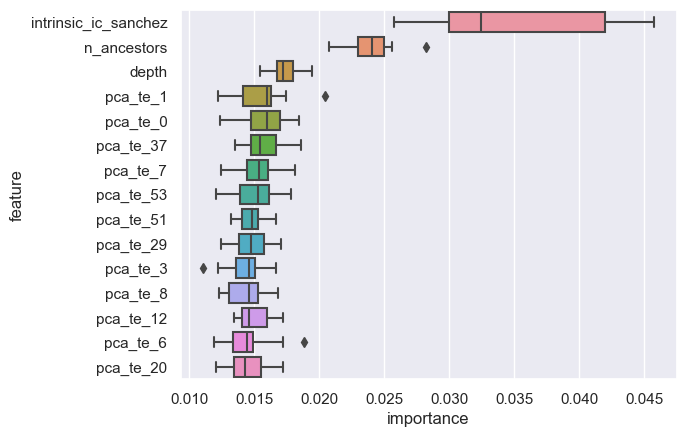

In [3]:
top_15_features = df["feature"].drop_duplicates()[:15]
sns.boxplot(data=df[df["feature"].isin(top_15_features)], x="importance", y="feature")

### Bottom 15 features

<Axes: xlabel='importance', ylabel='feature'>

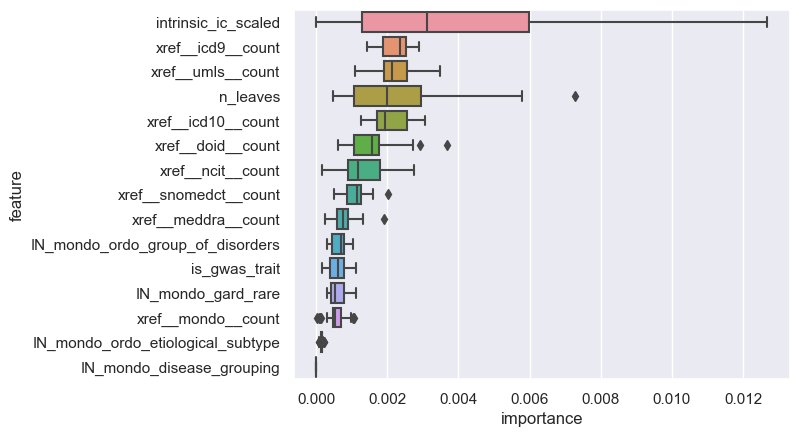

In [4]:
bottom_15_features = df["feature"].drop_duplicates()[-15:]
sns.boxplot(
    data=df[df["feature"].isin(bottom_15_features)], x="importance", y="feature"
)

## Feature importance: Groupped

Some features, which are related to each other, are groupped (summed) - Groups:
* PCA features: `pca_fg`
* XREF features: `xref_fg`
* GPT Tags features: `gpt_tags_fg`
* Subsets features: `subsets_fg`
* n_* (topological counts): `n_fg`

In [5]:
df_groupped = extract_feature_importance(
    "20230919_231920_pca64_subsets_gpt4_mae",
    feature_groups=[PCA_FG, GPT_FG, X_REF_FG, SUBSETS_FG, TOPO_FG],
)

# Human readable names
df_groupped.loc[df_groupped.feature == "pca_fg", "feature"] = "Description Embeddings"
df_groupped.loc[df_groupped.feature == "topo_fg", "feature"] = "Topology"
df_groupped.loc[df_groupped.feature == "xref_fg", "feature"] = "Cross-references"
df_groupped.loc[df_groupped.feature == "gpt_tags_fg", "feature"] = "GPT Tags"
df_groupped.loc[df_groupped.feature == "prefix", "feature"] = "Prefixes"
df_groupped.loc[df_groupped.feature == "subsets_fg", "feature"] = "Subsets"
df_groupped.loc[df_groupped.feature == "is_gwas_trait", "feature"] = "GWAS Traits"

/Users/romain/dev/nxontology-ml/.venv/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 64.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/romain/dev/nxontology-ml/.venv/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 72.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/romain/dev/nxontology-ml/.venv/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 68.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='importance', ylabel='feature'>

/Users/romain/dev/nxontology-ml/.venv/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 80.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/romain/dev/nxontology-ml/.venv/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 76.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


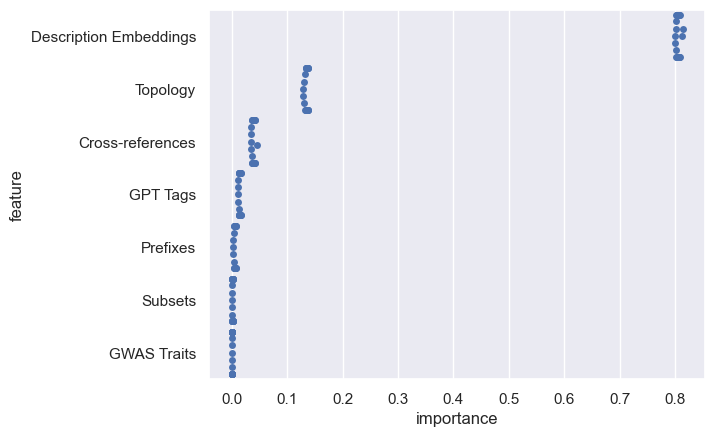

In [6]:
sns.swarmplot(data=df_groupped, x="importance", y="feature")

<Axes: xlabel='importance', ylabel='feature'>

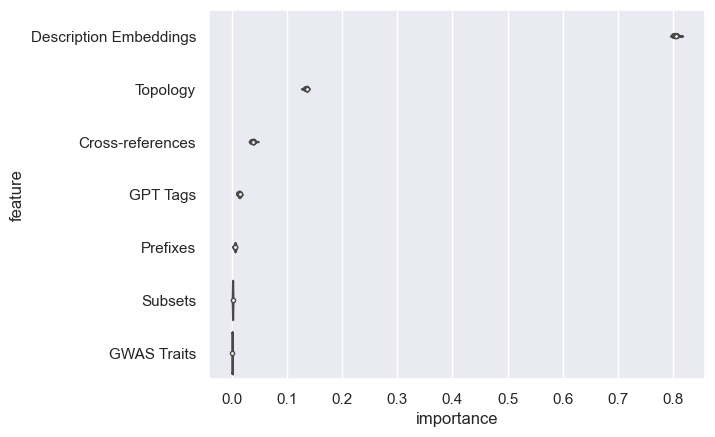

In [7]:
sns.violinplot(data=df_groupped, x="importance", y="feature")

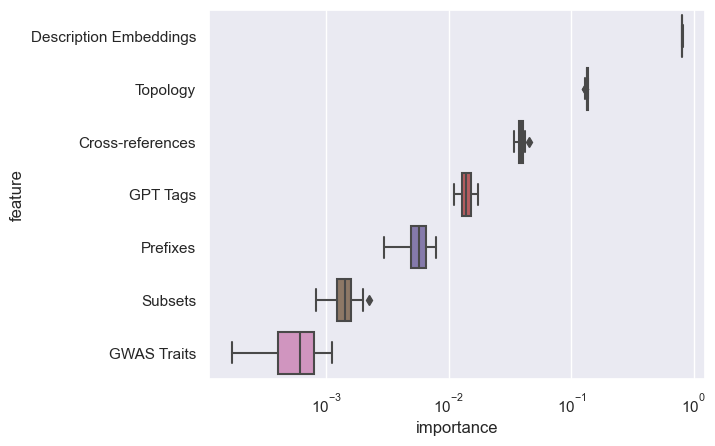

In [8]:
# Log version
sns.boxplot(data=df_groupped, x="importance", y="feature")
plt.xscale("log")

In [9]:
(
    df_groupped.groupby("feature")["importance"]
    .describe()
    .sort_values(by="50%", ascending=False)
    .drop(columns=["count"])
    .style.background_gradient(cmap="Blues", axis=None, vmin=0, vmax=1)
    .format("{:.4f}")
    .set_properties(**{"font-weight": "bold"}, subset=["50%"])
    .set_caption("Statistics")
)

,mean,std,min,25%,50%,75%,max
feature,,,,,,,
Description Embeddings,0.8051,0.0037,0.7991,0.8025,0.8047,0.8074,0.8138
Topology,0.1347,0.0027,0.1289,0.1337,0.1356,0.1366,0.1380
Cross-references,0.0387,0.0025,0.0340,0.0373,0.0390,0.0403,0.0452
GPT Tags,0.0141,0.0017,0.0111,0.0128,0.0139,0.0153,0.0172
Prefixes,0.0055,0.0013,0.0029,0.0049,0.0057,0.0066,0.0079
Subsets,0.0014,0.0003,0.0008,0.0012,0.0014,0.0016,0.0022
GWAS Traits,0.0006,0.0002,0.0002,0.0004,0.0006,0.0008,0.0011


## Appendix: All features

In [10]:
pd.set_option("display.max_rows", None)
(
    df.groupby("feature")["importance"]
    .describe()
    .sort_values(by="50%", ascending=False)
    .drop(columns=["count"])
    .style.background_gradient(cmap="Blues", axis=None, vmin=0, vmax=1)
    .format("{:.4f}")
    .set_properties(**{"font-weight": "bold"}, subset=["50%"])
    .set_caption("Statistics")
)

,mean,std,min,25%,50%,75%,max
feature,,,,,,,
intrinsic_ic_sanchez,0.0353,0.0068,0.0257,0.0299,0.0324,0.0419,0.0457
n_ancestors,0.0237,0.0017,0.0207,0.0230,0.0240,0.0249,0.0282
depth,0.0174,0.0010,0.0154,0.0167,0.0172,0.0180,0.0194
pca_te_1,0.0153,0.0018,0.0122,0.0141,0.0159,0.0163,0.0204
pca_te_0,0.0157,0.0016,0.0123,0.0147,0.0159,0.0170,0.0185
pca_te_37,0.0157,0.0016,0.0135,0.0147,0.0154,0.0166,0.0186
pca_te_7,0.0154,0.0013,0.0124,0.0144,0.0154,0.0160,0.0181
pca_te_53,0.0151,0.0015,0.0121,0.0139,0.0153,0.0161,0.0178
pca_te_51,0.0147,0.0009,0.0132,0.0140,0.0148,0.0153,0.0167


In [11]:
df.groupby("fold").describe()

importance                                                         \
          count      mean       std  min       25%       50%       75%   
fold                                                                     
0          97.0  0.010309  0.005985  0.0  0.008299  0.011669  0.013346   
1          97.0  0.010309  0.005426  0.0  0.008704  0.011349  0.013172   
2          97.0  0.010309  0.005906  0.0  0.006731  0.011540  0.013313   
3          97.0  0.010309  0.005465  0.0  0.007752  0.011426  0.013283   
4          97.0  0.010309  0.005929  0.0  0.006325  0.011592  0.012857   
5          97.0  0.010309  0.006033  0.0  0.008625  0.011186  0.013390   
6          97.0  0.010309  0.005376  0.0  0.006290  0.011844  0.013502   
7          97.0  0.010309  0.005352  0.0  0.007327  0.011721  0.013351   
8          97.0  0.010309  0.005351  0.0  0.006551  0.011631  0.013465   
9          97.0  0.010309  0.005997  0.0  0.005993  0.011301  0.013176   
10         97.0  0.010309  0.006111  0.0  0.006693  0.011146  0.013349   
11         97.0  0.010309  0.006259  0.0  0.006780  0.011664  0.013393   
12         97.0  0.010309  0.005617  0.0  0.007739  0.011489  0.013200   
13         97.0  0.010309  0.005330  0.0  0.007925  0.011561  0.013287   
14         97.0  0.010309  0.005463  0.0  0.006169  0.011204  0.013389   
15         97.0  0.010309  0.005309  0.0  0.008123  0.011513  0.013244   
16         97.0  0.010309  0.005469  0.0  0.006607  0.011764  0.013292   
17         97.0  0.010309  0.006016  0.0  0.007004  0.011316  0.012789   
18         97.0  0.010309  0.005895  0.0  0.005759  0.011285  0.013783   
19         97.0  0.010309  0.005459  0.0  0.007417  0.011230  0.013902   
20         97.0  0.010309  0.005555  0.0  0.006713  0.011280  0.013784   
21         97.0  0.010309  0.006274  0.0  0.006649  0.011085  0.013095   
22         97.0  0.010309  0.005871  0.0  0.007897  0.011385  0.013151   
23         97.0  0.010309  0.005596  0.0  0.006346  0.011352  0.013641   
24         97.0  0.010309  0.005436  0.0  0.006767  0.011439  0.013531   

                
           max  
fold            
0     0.041145  
1     0.034566  
2     0.041949  
3     0.030921  
4     0.041020  
5     0.043573  
6     0.026100  
7     0.027689  
8     0.031164  
9     0.043574  
10    0.042512  
11    0.045742  
12    0.032443  
13    0.026213  
14    0.030857  
15    0.028165  
16    0.029948  
17    0.042550  
18    0.039948  
19    0.025731  
20    0.030689  
21    0.043310  
22    0.040374  
23    0.031185  
24    0.029898